Import Packages

In [65]:
import pandas as pd
import numpy as np
import warnings
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import xgboost as xgb
import sklearn.metrics as metrics
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

Import Train and Test Dataset

In [3]:
train = pd.read_csv("/content/drive/MyDrive/Arya_Ass/training_set.csv", index_col = 'Unnamed: 0') 
test = pd.read_csv("/content/drive/MyDrive/Arya_Ass/test_set.csv", index_col = 'Unnamed: 0')

In [4]:
train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.34,0.00,0.00,1.20,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,0.56,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.56,3.38,0.00,1.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.08,0.00,0.50,0.00,0.08,16.30,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,0.00,0.00,1.29,0.00,0.00,0.00,1.29,0.64,0.00,1.93,0.00,2.58,0.00,0.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.46,0.37,0.00,2.44,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,0.00,0.00,0.00,0.00,0.58,0.00,0.58,0.58,0.58,0.58,0.00,1.74,0.00,0.00,1.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.24,0.24,0.00,3.34,123,207,1


In [5]:
train.shape,test.shape

((3910, 58), (691, 57))

In [6]:
train.isna().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
Y      0
dtype: int64

In [12]:
train.Y.value_counts()

0    2376
1    1534
Name: Y, dtype: int64

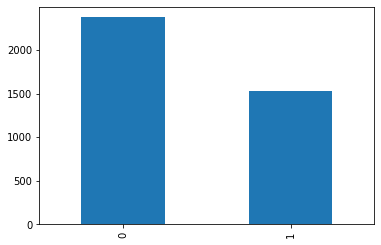

In [15]:
train['Y'].value_counts().plot(kind="bar")
plt.show()

In [16]:
train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00
mean,0.10,0.21,0.28,0.06,0.31,0.10,0.11,0.11,0.09,0.24,0.06,0.55,0.09,0.06,0.05,0.25,0.14,0.19,1.66,0.08,0.82,0.11,0.10,0.10,0.57,0.27,0.76,0.13,0.10,0.11,0.07,0.05,0.09,0.05,0.11,0.09,0.13,0.01,0.08,0.07,0.04,0.14,0.05,0.08,0.31,0.18,0.01,0.03,0.04,0.14,0.02,0.27,0.08,0.04,5.05,52.34,283.06,0.39
std,0.30,1.25,0.50,1.37,0.66,0.26,0.39,0.40,0.27,0.67,0.20,0.88,0.30,0.31,0.26,0.80,0.44,0.53,1.76,0.44,1.21,0.99,0.35,0.44,1.73,0.89,3.32,0.55,0.61,0.46,0.41,0.32,0.54,0.32,0.55,0.40,0.41,0.22,0.42,0.35,0.38,0.80,0.23,0.65,1.06,0.94,0.08,0.30,0.24,0.28,0.08,0.86,0.26,0.45,31.40,204.45,578.34,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.58,6.00,35.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,1.31,0.00,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,2.26,15.00,94.00,0.00
75%,0.00,0.00,0.43,0.00,0.39,0.00,0.00,0.00,0.00,0.17,0.00,0.82,0.00,0.00,0.00,0.11,0.00,0.00,2.64,0.00,1.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.00,0.00,0.00,0.19,0.00,0.32,0.05,0.00,3.71,43.00,264.00,1.00
max,4.34,14.28,4.54,42.81,9.09,3.57,7.27,11.11,3.23,18.18,2.61,9.67,5.55,5.55,4.41,20.00,7.14,7.69,18.75,6.32,11.11,17.10,5.45,12.50,20.83,16.66,33.33,9.09,14.28,5.88,12.50,4.76,18.18,4.76,20.00,7.69,5.05,8.33,11.11,4.76,7.14,14.28,3.57,20.00,21.42,22.05,2.17,10.00,4.38,9.75,2.78,32.48,6.00,19.83,1102.50,9989.00,10062.00,1.00


Visualization

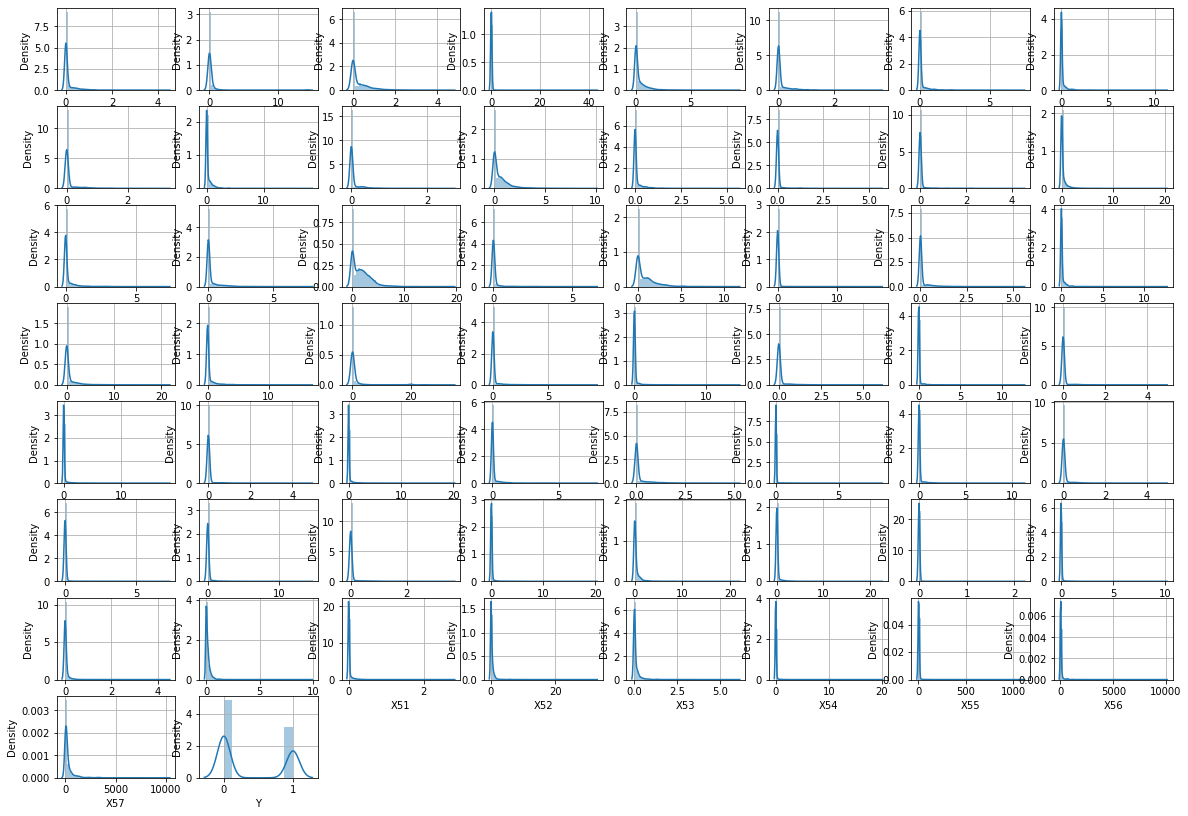

In [88]:
import seaborn as sns
plt.figure(figsize=(20,25))
for i, column in enumerate(list(train.columns)):
    plt.subplot(14,8, i+1)
    sns.distplot(train[column])
    plt.grid()

In [22]:
data = train.corr()

In [23]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
X1,1.00,-0.03,0.08,0.01,0.03,0.06,0.00,0.00,0.13,0.04,0.17,0.10,0.07,0.05,0.03,0.04,0.09,-0.00,0.12,0.03,0.17,-0.02,0.14,0.11,-0.07,-0.06,-0.07,-0.05,-0.04,-0.05,-0.04,-0.03,-0.04,-0.02,-0.05,-0.05,-0.06,-0.01,-0.02,-0.03,-0.01,-0.03,-0.02,-0.02,-0.04,-0.03,0.00,-0.02,-0.03,-0.02,-0.04,0.05,0.13,-0.01,0.03,0.06,0.10,0.13
X2,-0.03,1.00,-0.03,-0.01,-0.02,-0.02,0.01,-0.01,0.00,0.04,-0.01,-0.04,-0.02,-0.01,0.01,-0.01,-0.02,0.03,-0.06,-0.02,-0.02,-0.01,-0.02,-0.01,-0.04,-0.04,-0.03,-0.03,-0.02,-0.03,-0.02,0.00,-0.02,-0.00,-0.02,-0.03,-0.03,-0.01,-0.02,-0.01,-0.01,-0.03,-0.01,-0.02,-0.02,-0.02,-0.01,-0.02,-0.01,-0.05,-0.02,-0.01,-0.01,0.00,0.00,0.00,-0.02,-0.03
X3,0.08,-0.03,1.00,-0.02,0.07,0.09,0.04,0.02,0.10,0.03,0.05,0.08,0.05,0.00,0.12,0.08,0.04,0.12,0.16,0.04,0.16,-0.03,0.13,0.04,-0.09,-0.06,-0.11,-0.05,-0.06,-0.04,-0.04,-0.06,-0.05,-0.06,-0.05,-0.05,-0.06,-0.01,-0.02,-0.05,-0.03,-0.02,-0.04,-0.05,-0.06,-0.05,0.03,-0.03,-0.03,-0.02,-0.04,0.11,0.08,-0.01,0.08,0.09,0.07,0.20
X4,0.01,-0.01,-0.02,1.00,0.00,-0.01,0.02,0.00,0.00,-0.00,-0.01,-0.02,-0.01,0.01,0.01,-0.00,-0.00,0.02,-0.01,-0.01,0.01,0.00,0.02,0.03,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.00,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.00,0.00,-0.01,-0.01,-0.00,0.01,-0.00,0.00,0.02,0.02,0.06
X5,0.03,-0.02,0.07,0.00,1.00,0.07,0.16,0.03,0.02,0.04,0.07,0.07,0.03,0.01,0.06,0.10,0.14,0.07,0.10,0.04,0.14,-0.01,0.07,-0.00,-0.09,-0.07,-0.09,-0.06,0.03,-0.05,-0.04,-0.02,-0.02,-0.02,-0.05,-0.05,-0.07,0.13,-0.04,-0.02,-0.05,0.12,-0.05,0.02,-0.04,-0.08,-0.03,-0.03,-0.03,-0.05,-0.03,0.03,0.04,0.00,0.05,0.05,0.00,0.24
X6,0.06,-0.02,0.09,-0.01,0.07,1.00,0.07,0.10,0.13,0.02,0.05,0.01,0.07,0.02,0.18,0.03,0.07,0.08,0.10,0.08,0.12,0.02,0.22,0.07,-0.09,-0.09,-0.07,-0.07,-0.05,-0.05,-0.05,-0.04,-0.03,-0.04,-0.06,-0.06,-0.06,-0.02,-0.05,-0.03,-0.03,-0.06,-0.03,-0.03,-0.06,-0.03,-0.02,-0.03,-0.02,-0.00,-0.03,0.07,0.10,0.02,-0.01,0.08,0.09,0.25
X7,0.00,0.01,0.04,0.02,0.16,0.07,1.00,0.05,0.06,0.05,0.17,-0.00,0.01,-0.02,0.05,0.11,0.19,0.12,0.11,0.06,0.12,0.01,0.07,0.03,-0.09,-0.08,-0.07,-0.07,-0.05,-0.06,-0.05,-0.04,-0.04,-0.04,-0.05,-0.05,-0.05,-0.01,-0.05,-0.02,-0.03,-0.05,-0.05,-0.03,-0.05,-0.05,-0.02,-0.03,-0.04,-0.05,-0.04,0.04,0.06,0.04,0.04,0.05,-0.01,0.33
X8,0.00,-0.01,0.02,0.00,0.03,0.10,0.05,1.00,0.10,0.09,0.14,-0.00,0.02,0.02,0.07,0.05,0.21,0.04,0.03,0.15,0.17,-0.01,0.08,0.04,-0.06,-0.04,-0.06,-0.05,-0.04,-0.04,-0.04,-0.03,-0.04,-0.04,-0.03,-0.03,-0.03,-0.01,-0.04,-0.00,-0.03,-0.04,-0.01,-0.03,-0.00,-0.05,-0.01,-0.02,-0.03,-0.03,-0.02,0.03,0.05,-0.01,0.01,0.04,0.05,0.22
X9,0.13,0.00,0.10,0.00,0.02,0.13,0.06,0.10,1.00,0.14,0.15,0.03,0.03,0.08,0.24,0.01,0.13,0.10,0.05,0.16,0.15,-0.02,0.13,0.11,-0.08,-0.05,-0.07,-0.06,-0.05,-0.05,-0.05,-0.04,-0.01,-0.04,-0.05,-0.06,-0.03,-0.00,-0.04,-0.01,-0.04,-0.05,-0.04,-0.04,-0.08,-0.06,0.01,-0.03,-0.01,-0.03,0.03,0.05,0.16,-0.00,0.11,0.18,0.28,0.25
X10,0.04,0.04,0.03,-0.00,0.04,0.02,0.05,0.09,0.14,1.00,0.12,0.06,0.04,0.02,0.17,0.02,0.08,0.03,0.09,0.04,0.10,0.01,0.10,0.05,-0.04,-0.02,-0.07,0.01,-0.03,0.01,-0.02,-0.02,-0.03,-0.01,-0.02,-0.02,-0.01,-0.02,-0.01,0.00,-0.03,-0.05,0.02,-0.03,-0.04,-0.03,-0.02,-0.02,0.01,0.00,0.01,0.04,0.07,0.05,0.07,0.10,0.09,0.14


In [24]:
high_corelation_with_t = ['X7','X21','X23','X53']

In [25]:
corl = train.corr()

In [29]:
threshold = 0.8
for i in corl.columns:
    for j,k in zip(corl[i].index,corl[i]):
        if k > threshold and k!=1:
            print(i,j,k)

X32 X34 0.9952405059668576
X32 X40 0.8312446856194331
X34 X32 0.9952405059668576
X34 X40 0.828039414338698
X40 X32 0.8312446856194331
X40 X34 0.828039414338698


In [30]:
train[['X32','X34','X40','Y']].corr()

,X32,X34,X40,Y
X32,1.00,1.00,0.83,-0.11
X34,1.00,1.00,0.83,-0.11
X40,0.83,0.83,1.00,-0.06
Y,-0.11,-0.11,-0.06,1.00


In [34]:
drop_cols = ['X34','X40', 'Y']

In [35]:
feature_list = train.drop(drop_cols,axis=1).columns.tolist()

In [36]:
len(feature_list)

55

In [37]:
train_X,val_x,train_y,val_y = train_test_split(train[feature_list],
                                                                train[['Y']],
                                                                test_size = 0.20,
                                                                random_state = 7,
                                                                stratify = train[['Y']])

In [38]:

train_X.shape,train_y.shape,val_x.shape,val_y.shape

((3128, 55), (3128, 1), (782, 55), (782, 1))

# XGB

In [47]:

#(train_x_processed,val_x_processed,train_y,Val_y)
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

feature_names = feature_list

hpo_train = train_X.copy()
hpo_train_y = train_y.copy()

hpo_eval = val_x.copy()
hpo_eval_y = val_y.copy()

SEED = 1

def score(xgb_params):

    xgb_train = xgb.DMatrix(hpo_train, hpo_train_y,feature_names=feature_names,silent = True)
    xgb_eval = xgb.DMatrix(hpo_eval, hpo_eval_y,feature_names=feature_names,silent = True)
    #     num_round = int(xgb_params['n_estimators'])    
    xgb_model = xgb.train(xgb_params,
                xgb_train,
#                           num_boost_round=num_round,
                  evals=[(xgb_train, 'train'), (xgb_eval, 'val')],
                  verbose_eval=False,
                  early_stopping_rounds=10
                 )    
    train_X = xgb.DMatrix(hpo_train,feature_names=feature_names)
    prediction_train = xgb_model.predict(train_X,ntree_limit=xgb_model.best_ntree_limit)    
    
    test_X = xgb.DMatrix(hpo_eval,feature_names=feature_names)
    prediction_test = xgb_model.predict(test_X,ntree_limit=xgb_model.best_ntree_limit)    
    
    auc_train = roc_auc_score(hpo_train_y, prediction_train)
    auc_test= roc_auc_score(hpo_eval_y, prediction_test)    
    
    loss = abs(auc_train - auc_test)  ## For optimizing stability
#   loss = 1 - auc_test    For optimizing auc only    
    return {'loss': loss, 'status': STATUS_OK}

def optimize(
             #trials,
             random_state=SEED):
    """
    This is the optimization function that given a space (space here) of
    hyperparameters and a scoring function (score here), finds the best hyperparameters.
    """
    space = {
        'max_depth':  hp.choice('max_depth', np.arange(4, 12, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 13,50 , 1),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.5),
        'gamma': hp.quniform('gamma', 0.1, 1, 0.01),        
        'reg_alpha' : hp.quniform('reg_alpha', 1,30,0.1),
        'reg_lambda' : hp.quniform('reg_lambda', 0,1,0.01),        
        'colsample_bytree': hp.quniform('colsample_bytree', 0.3, 1, 0.1),
        'eval_metric': 'auc',
        'objective':'binary:logistic',
        'booster' : 'gbtree',
        'tree_method': 'exact',
#         'silent': 1,
        'seed': random_state
    }
    # Use the fmin function from Hyperopt to find the best hyperparameters
    best = fmin(score, space, algo=tpe.suggest,
                # trials=trials,
                max_evals=500)
    return best

In [50]:
best_hyperparams = optimize(1)
print("The best hyperparameters are: ", "\n")
print(best_hyperparams)

100%|██████████| 500/500 [01:23<00:00,  6.01it/s, best loss: 1.236743907506721e-06]
The best hyperparameters are:  

{'colsample_bytree': 0.5, 'gamma': 0.28, 'max_depth': 7, 'min_child_weight': 50.0, 'reg_alpha': 4.7, 'reg_lambda': 0.8200000000000001, 'subsample': 1.0}


In [51]:
feature_names= feature_list

def model(train_X,val_X,train_y,val_y,feature_names=feature_names):

        xgb_params = {'colsample_bytree': 0.7, 'gamma': 0.59, 'max_depth': 6, 
                      'min_child_weight': 29.0,'reg_alpha': 5.800000000000001, 
                      'reg_lambda': 0.39, 'subsample': 1.0,
                    'learning_rate': 0.01,
                    'objective': 'binary:logistic',
                    'eval_metric':'auc',
                    'thread':-1,
                    'n_estimator':50,
                    }
#     {'colsample_bytree': 0.7, 'gamma': 0.19, 'max_depth': 7, 
#                       'min_child_weight': 27.0, 'reg_alpha': 16.5, 'reg_lambda': 0.32, 'subsample': 1.0,

        xgb_train = xgb.DMatrix(train_X, train_y,feature_names=feature_names, missing=-999)
        xgb_eval = xgb.DMatrix(val_X, val_y,feature_names=feature_names, missing=-999)

        xgb_model = xgb.train(xgb_params,
                      xgb_train,num_boost_round=500,
                      evals=[(xgb_train, 'train'), (xgb_eval, 'val')],
                      verbose_eval=20,
                      early_stopping_rounds=5,
                              
                     )

        print(xgb_model)
        return xgb_model

In [52]:
xgb_model = model(train_X,val_x,train_y,val_y)

[0]	train-auc:0.932263	val-auc:0.924893
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 5 rounds.
Stopping. Best iteration:
[10]	train-auc:0.960979	val-auc:0.960981



In [56]:
train_X1 = xgb.DMatrix(train_X,feature_names=feature_names)
prediction_train = xgb_model.predict(train_X1)
val_x1 = xgb.DMatrix(val_x,feature_names=feature_names)
prediction_val = xgb_model.predict(val_x1)

In [57]:
prediction_validation = [1 if x > 0.5 else 0 for x in prediction_val]
prediction_train = [1 if x > 0.5 else 0 for x in prediction_train]

In [73]:
import eazeml as ez
def print_report(y_test,y_pred):
    print("F1 Score :", f1_score(y_test,y_pred,average = "weighted"))
    print('AUC-ROC Score :', roc_auc_score(y_test, y_pred)) ## only for Binary Classification
    print('Report:\n',classification_report(y_test, y_pred))
    ez.confusion_mat(y_test,y_pred)

In [72]:
from sklearn.metrics import f1_score 
from sklearn.metrics import roc_auc_score

F1 Score : 0.9112825652298386
AUC-ROC Score : 0.902556326250457
Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      1901
           1       0.91      0.86      0.88      1227

    accuracy                           0.91      3128
   macro avg       0.91      0.90      0.91      3128
weighted avg       0.91      0.91      0.91      3128



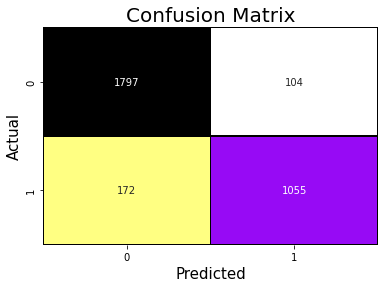

None


In [74]:
print(print_report(train_y,prediction_train))

F1 Score : 0.9045391321175656
AUC-ROC Score : 0.8933036173495629
Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       475
           1       0.91      0.84      0.87       307

    accuracy                           0.91       782
   macro avg       0.91      0.89      0.90       782
weighted avg       0.91      0.91      0.90       782



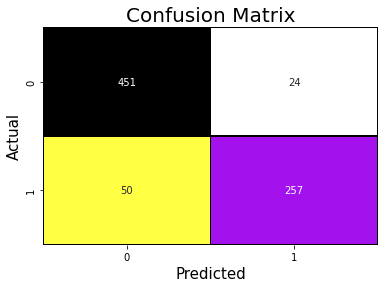

None


In [75]:

print(print_report(val_y,prediction_validation))

Prediction for test file and saving files

In [76]:
test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.70,0.00,0.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.41,1.41,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,2.34,47,89
1,0.00,0.00,0.84,0.00,0.84,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,2.54,0.00,1.69,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.78,0.13,0.00,10.38,168,249
2,0.46,0.30,0.46,0.00,0.05,0.12,0.05,0.28,0.43,0.74,0.25,0.97,0.56,1.23,0.00,0.25,0.43,0.02,3.22,0.00,1.46,0.00,1.05,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.07,0.00,0.33,0.76,0.15,5.89,193,3040
3,0.10,0.20,1.01,0.00,0.80,0.80,0.50,0.00,0.80,0.10,0.30,0.70,0.30,0.00,1.61,0.10,0.00,1.11,1.31,0.20,0.70,0.00,0.60,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.00,0.10,0.10,0.00,0.00,0.00,0.11,0.00,0.49,0.16,0.01,8.55,669,1351
4,0.00,0.00,0.72,0.00,0.72,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00,1.45,0.00,1.45,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.36,0.00,0.73,0.12,0.00,7.78,32,249


In [77]:
test[feature_list]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X35,X36,X37,X38,X39,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.70,0.00,0.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.41,1.41,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.00,2.34,47,89
1,0.00,0.00,0.84,0.00,0.84,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,2.54,0.00,1.69,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.78,0.13,0.00,10.38,168,249
2,0.46,0.30,0.46,0.00,0.05,0.12,0.05,0.28,0.43,0.74,0.25,0.97,0.56,1.23,0.00,0.25,0.43,0.02,3.22,0.00,1.46,0.00,1.05,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.07,0.00,0.33,0.76,0.15,5.89,193,3040
3,0.10,0.20,1.01,0.00,0.80,0.80,0.50,0.00,0.80,0.10,0.30,0.70,0.30,0.00,1.61,0.10,0.00,1.11,1.31,0.20,0.70,0.00,0.60,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.00,0.10,0.10,0.00,0.00,0.00,0.11,0.00,0.49,0.16,0.01,8.55,669,1351
4,0.00,0.00,0.72,0.00,0.72,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00,1.45,0.00,1.45,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.36,0.00,0.73,0.12,0.00,7.78,32,249
5,0.00,0.00,1.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.49,0.00,2.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.49,0.00,0.00,0.00,0.00,0.00,0.00,1.07,0.00,0.00,1.00,1,13
6,0.33,0.84,0.67,0.00,0.67,0.33,0.67,0.00,0.33,0.00,0.16,0.84,0.16,0.00,0.00,0.67,0.00,0.50,3.03,0.33,2.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.18,0.00,0.16,0.10,0.03,6.50,525,858
7,0.00,0.00,0.00,0.00,0.00,1.21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.21,0.00,1.21,2.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.21,0.00,0.00,0.00,0.00,0.00,0.00,1.63,0.00,0.47,2.59,31,127
8,0.00,0.48,0.48,0.00,0.48,0.00,0.00,0.48,0.00,0.00,0.00,0.96,0.00,0.00,1.92,0.00,0.48,0.96,2.88,0.00,2.88,0.00,1.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.08,0.34,0.00,3.20,12,80
9,0.08,0.00,0.93,0.00,1.52,0.33,0.00,0.08,0.67,0.00,0.25,0.67,0.16,0.00,1.69,0.08,0.00,1.10,1.86,0.16,0.42,0.00,1.10,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.08,0.08,0.00,0.00,0.01,0.10,0.00,0.36,0.10,0.01,11.32,669,1834


In [81]:
test1 = xgb.DMatrix(test[feature_list],feature_names=feature_list)
prediction_test = xgb_model.predict(test1)
predictiontest = [1 if x > 0.5 else 0 for x in prediction_test]
predictiontest

[0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [79]:
pd.DataFrame(predictiontest,columns=['result']).to_csv('prediction_test.csv',index=False)

In [82]:
result = ez.quick_pred(train.drop('Y',axis=1),train[['Y']],'c')


Please wait Training-Testing with all models..



  0%|          | 0/6 [00:00<?, ?it/s]

Done with  LogisticRegression
Done with  RandomForestClassifier
Done with  XGBoost Classifier
Done with  LGBoost Classifier
Done with  AdaBoost Classifier
Done with  GradientBoostingClassifier
                        Model  F1 score  AUC-ROC score  Accuracy  \
3          LGBoost Classifier      0.97           0.96      0.97   
1      RandomForestClassifier      0.93           0.93      0.93   
5  GradientBoostingClassifier      0.93           0.93      0.93   
2          XGBoost Classifier      0.90           0.90      0.90   
0          LogisticRegression      0.87           0.87      0.87   
4         AdaBoost Classifier      0.87           0.87      0.87   

   Balanced Accuracy Score  
3                     0.96  
1                     0.93  
5                     0.93  
2                     0.90  
0                     0.87  
4                     0.87  

Check returned table



In [83]:
result

,Model,F1 score,AUC-ROC score,Accuracy,Balanced Accuracy Score
3,LGBoost Classifier,0.966554,0.964286,0.966667,0.964286
1,RandomForestClassifier,0.933333,0.933036,0.933333,0.933036
5,GradientBoostingClassifier,0.933333,0.933036,0.933333,0.933036
2,XGBoost Classifier,0.900111,0.901786,0.900000,0.901786
0,LogisticRegression,0.866667,0.866071,0.866667,0.866071
4,AdaBoost Classifier,0.866667,0.866071,0.866667,0.866071
